### Preparing the Titanic dataset

In this exercise we need to prepare the Titanic dataset for the upcoming tasks in unsupervised learning. With the two algorithms we want to classify or predict wether a passenger of the titanic survived or not. First of all we need to load the necessary libraries which will help us to explore and visualize the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib
import pydot
import pydotplus
import re
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter


import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.exceptions import NotFittedError
from sklearn.base import BaseEstimator, ClassifierMixin

from graphviz import Source
from sklearn import tree
from dtreeviz.trees import *

from IPython.display import display
from IPython.display import SVG

Load the Titanic dataset (train and test) with pandas

In [2]:
# Load the train and test datasets from the CSV files

# STUDENT CODE HERE 


test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')


# Student CODE until HERE

In [3]:
# Combine the the train and the test dataset to a full dataset and display the first 5 rows of the train dataset

# Display the first 5 rows of the train data set

# STUDENT CODE HERE 
#full_data=pd.concat([train,test],sort=False)
full_data=[train,test]
train.head(5)

#print(frames)
# Student CODE until HERE

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Print the columns of the data frame
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#### Question: What do you see when we print the column names and how can you interpret them ?

Your answer:
 * **Survived**: Outcome of survival (int: 0 = No; 1 = Yes) 
 * **Pclass**: Socio-economic class (int: 1 = Upper class; 2 = Middle class; 3 = Lower class)
 * **Name**: Name of passenger (string)
 * **Sex**: Sex of the passenger (string)
 * **Age**: Age of the passenger (float: Some entries contain NaN)
 * **SibSp**: Number of siblings and spouses of the passenger aboard (int)
 * **Parch**: Number of parents and children of the passenger aboard (int)
 * **Ticket**: Ticket number of the passenger (string)
 * **Fare**: Fare paid by the passenger (float)
 * **Cabin** Cabin number of the passenger (string: Some entries contain NaN)
 * **Embarked**: Port of embarkation of the passenger (string: C = Cherbourg; Q = Queenstown; S = Southampton)

In [5]:
# Inspect the data, *info* can be used to show how complete or incomplete the
# dataset is
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Question: What do you see when you look at the dataset ?

Your answer: It can be seen that the dataset is incomplete. The Age, Cabin and Embarked columns have probably entries which are not defined. The dataset has 1309 entries in total. The category "Survived" has only 891 entries, hence the train dataset probably has 891 entries and the test dataset has 418


## Task 1.1: Visualizing the Data 

After investigating the tabels and the description of the titanic dataset we cannot say alot about the data yet. We do not have any information about the distribution and correclation of the variables with respect to the individual chances of survival. In order to get a better understanding of the dataset, it is beneficial to visualize it.

A well kown tool to visualize data using Python is the library *matplotlib*. It is well [documented](https://matplotlib.org/) and allows for extensive customizability.

Additionally we will introduce [*seaborn*](https://seaborn.pydata.org/), a wrapper which uses matplotlib, but offers a higher-level interface for visualizing data.

With the first 3 plots we want to investigate:

* how many passenger of the titanic survived the tragedy
* the total number of passengers with respect to its class
* the passengers sorted by their ages

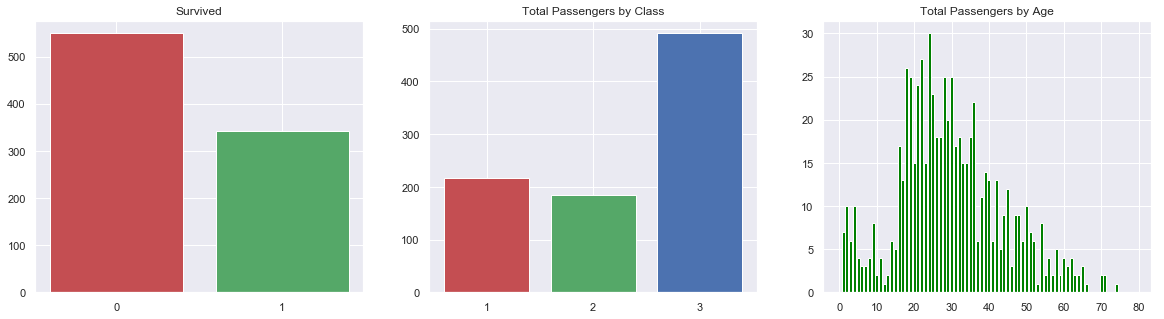

In [6]:
# First we start off with matplotlib and setup the figures and plots
f,ax = plt.subplots(1,3,figsize=(20,5))
colors = ["r", "g", "b"]

# Now we look at some general distributions of the data.


# Survived Class
x_survived = [0,1]
y_survived = [np.where(train["Survived"] == (i))[0].size for i in x_survived]
ax[0].bar(x_survived, y_survived, color=colors)
ax[0].set_xticks(x_survived)
ax[0].set_title('Survived')


# Passenger Class
x_pclass = [1, 2, 3]
y_pclass = [np.where(train["Pclass"] == (i))[0].size for i in x_pclass]
ax[1].bar(x_pclass, y_pclass, color=colors)
ax[1].set_xticks(x_pclass)
ax[1].set_title('Total Passengers by Class')


# Age
x_age = np.arange(0, 80)
y_age = [np.where(train["Age"] == (i))[0].size for i in x_age]
ax[2].bar(x_age, y_age, color="green")
ax[2].set_xticks(np.arange(0, 81, 10))
ax[2].set_title('Total Passengers by Age')


# Display the graphs
plt.show()

Text(0.5, 1.0, 'Total Passengers by Age')

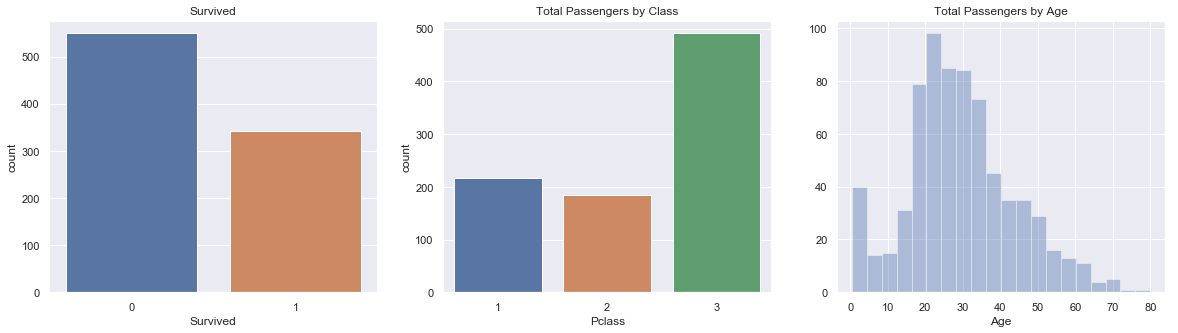

In [7]:
# The categorical histograms we created with matplotlib can be created with the
# "countplot" command in seaborn. The setup is very similar, but easier.

f,ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot('Survived',data=train,ax=ax[0])
ax[0].set_title('Survived')

sns.countplot('Pclass',data=train,ax=ax[1])
ax[1].set_title('Total Passengers by Class')

sns.distplot(train['Age'].dropna(),ax=ax[2],bins=20, kde = False)
ax[2].set_title('Total Passengers by Age')

In order to show the various options of [*seaborn*](https://seaborn.pydata.org/) we are going to plot the survival rate with respect to the categories class, sex, embarked, Siblings, Parch and fare. So in total you should get 6 plots

Text(0.5, 1.0, 'Survival Rate by Embarked')

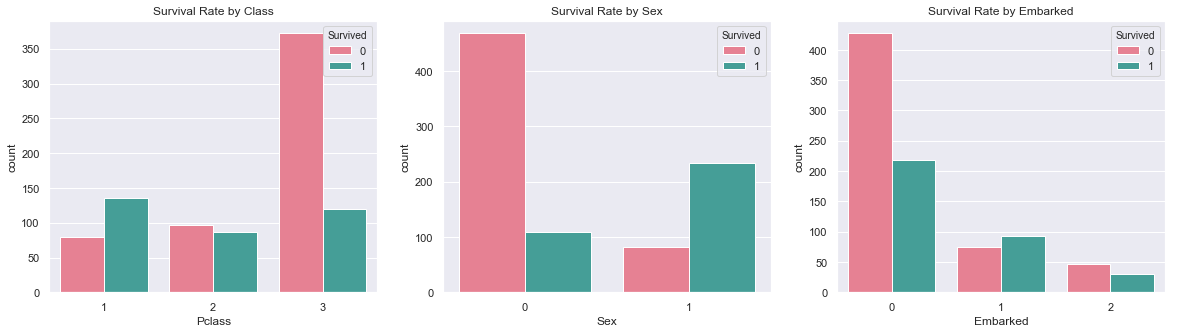

In [41]:
# STUDENT CODE HERE
# I think the survival rate should be normalized between(0.1)
f,ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot('Pclass',hue='Survived',data=train,ax=ax[0],palette='husl')
ax[0].set_title('Survival Rate by Class')

sns.countplot('Sex',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[1].set_title('Survival Rate by Sex')

sns.countplot('Embarked',hue='Survived',data=train,ax=ax[2],palette='husl')
ax[2].set_title('Survival Rate by Embarked')


# STUDENT CODE until HERE

Text(0.5, 1.0, 'Survival Rate by Fare')

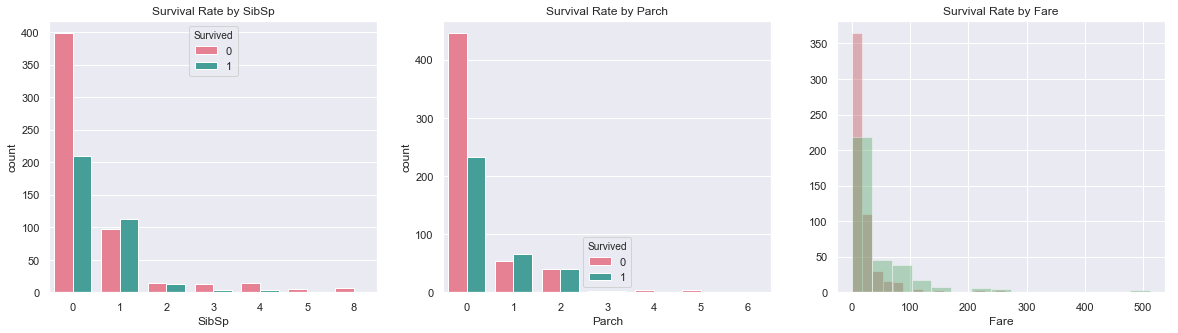

In [42]:
#### STUDENT'S CODE ####

f,ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot('SibSp',hue='Survived',data=train,ax=ax[0],palette='husl',)
ax[0].set_title('Survival Rate by SibSp')

sns.countplot('Parch',hue='Survived',data=train,ax=ax[1],palette='husl')
ax[1].set_title('Survival Rate by Parch')

sns.distplot(train[train['Survived']==0]['Fare'].dropna(),ax=ax[2],kde=False,color='r',bins=15)
sns.distplot(train[train['Survived']==1]['Fare'].dropna(),ax=ax[2],kde=False,color='g',bins=15)
ax[2].set_title('Survival Rate by Fare')

#### END STUDENT'S CODE ####

#### Question: Which statements can  be made on the basis of the plots ?
1.We can see that you had a higher chance of surviving if you were in an upper class or female. You also had a higher chance of surviving if you didn't embark in Cherbourg, if you had one sibling or spouse on board or if you had fewer children or parents on board.

## Task 1.2 Cleaning up the Data

The most datasets out of real world applications are messy. They include missing values, outliers and invalid data. In order to improve the data quality these values have to be replaced. The resulting gap in the dataset can be closed by interpolation or by dropping the respective entries.

### 1.2.1 Detecting and Filtering Outliers

Outliers that are either very large or small skew the overall view of the data. One way of detecting outliers could be the use of the standard deviation. If we assume that the data is normally distributed, then 95 percent of the data is within 1.96 standard deviations of the mean (z-Transformation). So we can drop the values either above or below that range.

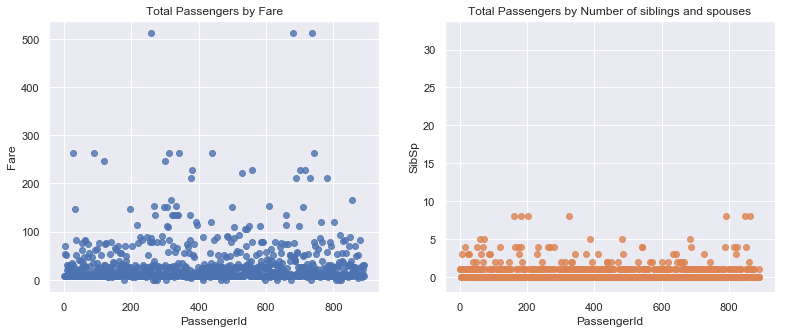

In [9]:
f,ax = plt.subplots(1,2,figsize=(13,5))
# The outliers in Fare (Fare paid by the passenger)
sns.regplot(x=train["PassengerId"], y=train["Fare"], fit_reg=False, ax=ax[0])
# SibSp(Number of siblings and spouses of the passenger aboard)
sns.regplot(x=train["PassengerId"], y=train["SibSp"], fit_reg=False, ax=ax[1])

ax[0].set_title('Total Passengers by Fare')
ax[1].set_title('Total Passengers by Number of siblings and spouses')

plt.show()

In [46]:
# Outlier detection  Method 1 using Standard Deviation
def detect_outliers_sd(df,n,features):
    #1. Calculate the mean and standard deviation (std) of our data df
    #2. Add 1.96*std to the mean. Any number greater than this is a suspected outlier
    #3. Subtract 1.96*std from the mean value. Any number less than this is a suspected outlier
    
    # STUDENT CODE HERE
    
    multiple_outliers_total = []
    for i in features:
        mean = df[i].mean()
        std = df[i].std()
        upper_limit = mean+1.96*std
        lower_limit = mean-1.96*std
        
        outliers = df[(df[i]<lower_limit) | (df[i]>upper_limit)].index
        multiple_outliers_total.extend(outliers)
    
    multiple_outliers = []
    outliers_set = set(multiple_outliers_total)   
    for j in outliers_set:
        count = multiple_outliers_total.count(j)
        if count>n:
            multiple_outliers.append(j)
        

    # STUDENT CODE until HERE
    return multiple_outliers 
outliers = detect_outliers_sd(train, 2, ["Age","SibSp","Parch","Fare"])
print(train.loc[outliers])

     PassengerId  Survived  Pclass                               Name  Sex  \
27            28         0       1     Fortune, Mr. Charles Alexander    0   
88            89         1       1         Fortune, Miss. Mabel Helen    1   
119          120         0       3  Andersson, Miss. Ellis Anna Maria    1   
642          643         0       3      Skoog, Miss. Margit Elizabeth    1   
261          262         1       3  Asplund, Master. Edvin Rojj Felix    0   
297          298         0       1       Allison, Miss. Helen Loraine    1   
305          306         1       1     Allison, Master. Hudson Trevor    0   
341          342         1       1     Fortune, Miss. Alice Elizabeth    1   
386          387         0       3    Goodwin, Master. Sidney Leonard    0   
438          439         0       1                  Fortune, Mr. Mark    0   

     Age  SibSp  Parch   Ticket      Fare        Cabin  Embarked  Name_length  \
27    19      3      2    19950  263.0000  C23 C25 C27      

In [48]:
# Outlier detection Method 2 using Interquartile Ranges 
def detect_outliers_iqr(df, n ,features):
    #1. Calculate the interquartile range (IQR) for our data df 
    #2. Multiply the IQR by the number 1.5
    #3. Add 1.5*IQR to the third quartile. Any number greater than this is a suspected outlier
    #4. Substract 1.5*IQR from the first quartile. Any number less than this is a suspected outlier
    
    # STUDENT CODE HERE
    
    outliers_index=[]
    for col in features:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        bot=Q1-1.5*IQR
        top=Q3+1.5*IQR
        
        outliers=df.loc[(df[col]>top) | (df[col]<bot)].index
        outliers_index.extend(outliers)
        
    outliers_index=Counter(outliers_index)
    multiple_outliers=list(k for k,v in outliers_index.items() if v>n)    
        
    # STUDENT CODE until HERE

    return multiple_outliers

call the detect outlier function and get the outliers ;)

In [13]:
outliers = detect_outliers_iqr(train, 2, ["Age","SibSp","Parch","Fare"])
train.loc[outliers]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


and remove them

In [14]:
# Drop the outliers
train = train.drop(outliers, axis = 0).reset_index(drop=True)

### Complementary functions

In the most cases Machine Learning algorithms cannot work with missing values. Therefore, we have to create a few functions
to solve that problem.

In [15]:
# The .info function shows how complete or incomplete the datasets are. 
print(train.isnull().sum())# 统计为空的数量
print('-'*30)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64
------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We can complete missing data by calculating:
* mean, 
* median, or 
* mean + randomized standard deviation.  

Before we can complete the missing data, we should decide which method is best based on the description of the data.

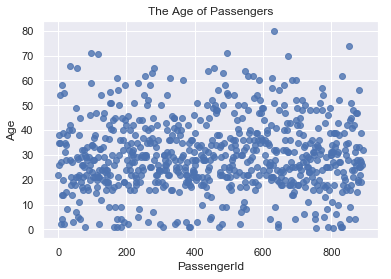

In [16]:
# The outliers in Age 
sns.regplot(x=train["PassengerId"], y=train["Age"], fit_reg=False)
plt.title('The Age of Passengers')
plt.show()

In [49]:
# Fill the missing data in Age using mean + randomized standard deviation. 

# STUDENT CODE HERE
for dataset in full_data:
    age_avg=dataset['Age'].mean()
    age_std=dataset['Age'].std()
    age_null_count=dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    
    df_age = dataset['Age'].copy()
   
    df_age[np.isnan(df_age)] = [age_null_random_list]
    dataset['Age'] = df_age.astype(int)
# STUDENT CODE until HERE

In [50]:
# The Description of Fare
print ("median {:>10}".format(train['Fare'].median()))
train['Fare'].describe()

median    14.4542


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [51]:
# Fill the missing data in Age using median standard deviation.
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

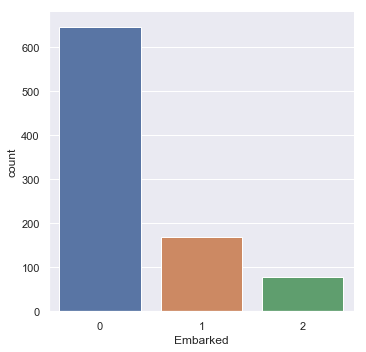

In [52]:
sns.catplot('Embarked',data=train,kind='count')
plt.show()

In [53]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [54]:
# update the dataframes
train = full_data[0]
test = full_data[1]
# any: Can detect if a cell matches a condition very quickly
print(train.isnull().any())
print('-'*30)
print(test.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Name_length    False
Age_bin        False
Fare_log       False
Fare_bin       False
dtype: bool
------------------------------
PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Name_length    False
Age_bin        False
Fare_log       False
Fare_bin       False
dtype: bool


## Task 2: Feature Engineering

Qualitative data is often nominal (e.g. names) or categorical (e.g. sex). Those can't be ordered and are difficult to evaluate. Therefore we want to convert all our variables to quantitiative data, i.e. numerical or ordinal values.

We can convert the names to attribute based on their length:  

In [55]:
for dataset in full_data:
    try:
        dataset['Name_length'] = train['Name'].apply(len)
    except:
        print("Name_length feature is located in the data frame")
        
train['Name_length'].head() 


0    23
1    51
2    22
3    44
4    24
Name: Name_length, dtype: int64

In [56]:
sum_Name = train[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).sum()  #以"Name_length"进行分组，将组内survived数据相加
average_Name = train[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()
#print(average_Name)

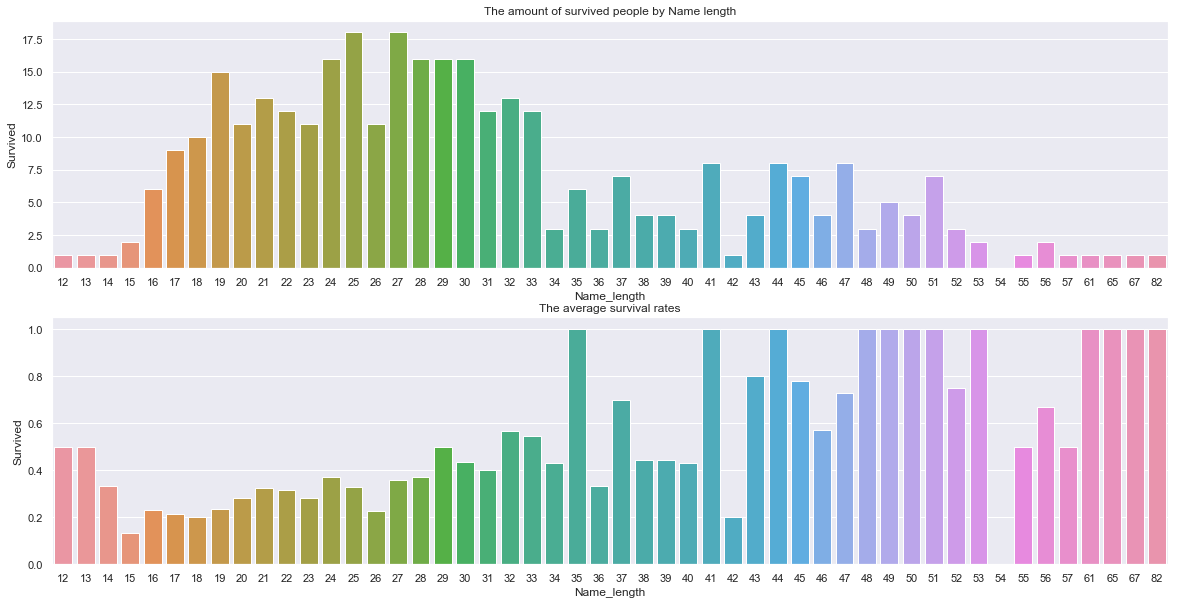

In [26]:
fig, ax = plt.subplots(2,1,figsize=(20,10))

# The amount of survived people by Name length.
sum_Name = train[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).sum()
sns.barplot(x='Name_length', y='Survived', data=sum_Name, ax = ax[0])
ax[0].set_title('The amount of survived people by Name length')

# The amount of survived people by Name length.
average_Name = train[["Name_length", "Survived"]].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=average_Name, ax = ax[1])
ax[1].set_title('The average survival rates')

plt.show()

#### Question: What can you see from the graphics above ?

Your answer:
We can see, that the passengers with longer names, had higher survival rates. Those were probably the whealthier people.

It can also be helpful to create meaningful "bins" for attributes. Therefore we will divide the Name_length feature into small classes. Each of these classes has a similar rate to survive.

In [27]:
# STUDENT CODE HERE
for dataset in full_data:
    dataset.loc[ dataset['Name_length'] <= 23, 'Name_length']= 0
    dataset.loc[(dataset['Name_length'] > 23) & (dataset['Name_length'] <= 28), 'Name_length']= 1
    dataset.loc[(dataset['Name_length'] > 28) & (dataset['Name_length'] <= 40), 'Name_length']= 2
    dataset.loc[ dataset['Name_length'] > 40, 'Name_length'] = 3
train['Name_length'].value_counts()
# STUDENT CODE until HERE

0    360
1    240
2    201
3     90
Name: Name_length, dtype: int64

In the next step we are mapping the gender feature

In [28]:
# STUDENT CODE HERE
for dataset in full_data:
    # np.where takes as input a list of Booleans, a new value and a backup value
    try:
        dataset['Sex'] = np.where(dataset['Sex']=='female', 1, 0)
    except:
        print('The value is already converted ')

train['Sex'].head()
# STUDENT CODE until HERE

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int32

We can also look at the Age feature

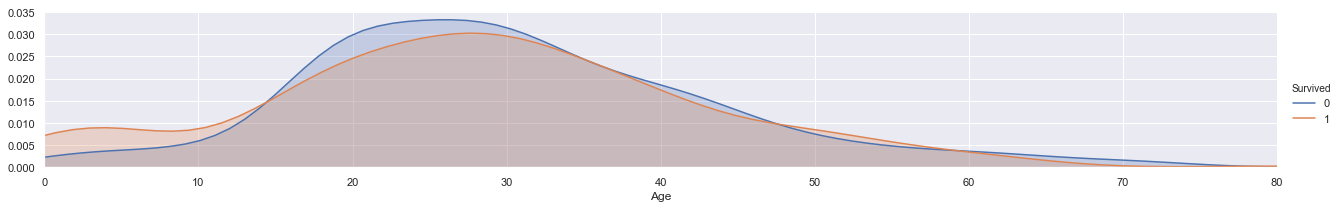

In [29]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( train, hue = 'Survived', aspect=6 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

#### Question: Which statements can be made about the graphic/plot above ? 

Your answer:
It can be seen that until the age of 14 the chance of survival was higher than the chance to die. From the age of 14 till the age of 30 the death rate was higher than the survival rate. After that the survival and the death rate are pretty similar to each other

Therefore the best categories for age are:
* 0: less than 14
* 1: 14 to 30
* 2: 30 to 36
* 3: 36 to 48
* 4: 48 to 60
* 5: 60 and more

Try to map the *Age* feature according to the plot and your given answer into an *Age_bin*:

In [57]:
# STUDENT CODE HERE
for dataset in full_data:
    dataset.loc[ dataset['Age'] <= 14, 'Age_bin'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age_bin'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 36), 'Age_bin'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 48), 'Age_bin'] = 3
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 60), 'Age_bin'] = 4
    dataset.loc[ dataset['Age'] > 60, 'Age_bin'] = 5
train['Age_bin'].value_counts()
# STUDENT CODE until HERE

1.0    440
3.0    153
2.0    140
0.0     78
4.0     58
5.0     22
Name: Age_bin, dtype: int64

The next step is to map the Embarked feature

In [60]:
# STUDENT CODE HERE
for dataset in full_data:
  try:
      dataset.Embarked.replace(('S','C','Q'), (0,1,2), inplace = True)
  except:
      print('The value is already converted ')

train['Embarked'].head()
# STUDENT CODE until HERE

The value is already converted 
The value is already converted 


0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

Additionally data might be skewed. For example, if we look at the *Fare* attribute, we can see it is heavily skewed to the left:

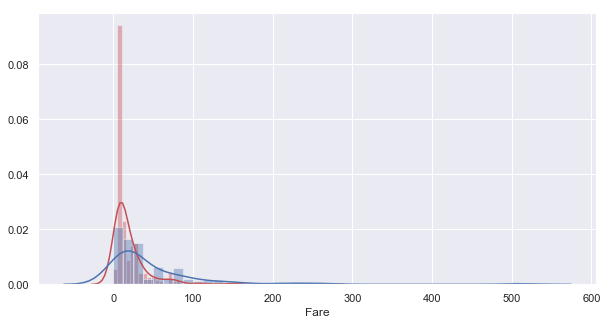

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(train["Fare"][train["Survived"] == 0], color="r")
sns.distplot(train["Fare"][train["Survived"] == 1], color="b")

To reduce the skewedness of this attribute, we can transform it with the log function. This redistributes the data:

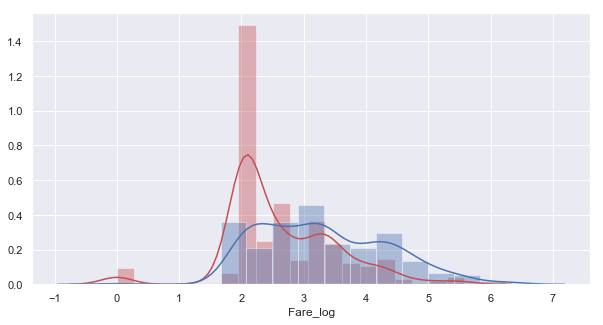

In [61]:
# STUDENT CODE HERE
for dataset in full_data:
    dataset["Fare_log"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
    


fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(train["Fare_log"][train["Survived"] == 0], color="r", ax=ax)
sns.distplot(train["Fare_log"][train["Survived"] == 1], color="b", ax=ax)

# STUDENT CODE until HERE

#### Question: What can you see if you plot the survival rate vs. the Fare_log ?

Your answer:For Fare_log avlues smaller than 2.7 the survival rate is lower than the death rate. For values higher than 2.7 it's the other way around.

Try to map your answer into the *Fare_bin* feature

In [35]:
for dataset in full_data:
    dataset.loc[ dataset['Fare_log'] <= 2.7, 'Fare_bin'] = 0
    dataset.loc[ dataset['Fare_log'] > 2.7, 'Fare_bin'] = 1
    dataset['Fare_bin'] = dataset['Fare_bin'].astype(int)
train['Fare_bin'].value_counts()

0    457
1    434
Name: Fare_bin, dtype: int64

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Age_bin,Fare_log,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,0,1.0,1.981001,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3,2.0,4.266662,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1.0,2.070022,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3,2.0,3.972177,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1,2.0,2.085672,0


## Task 3: Feature Selection

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant properties from the data that should not contribute to the overall accurarcy.

Try to find which features are not relevant for our data analysis and drop them.

In [37]:
# The .info function shows how complete or incomplete the datasets are. 

# STUDENT CODE HERE
print(train.isnull().sum())
print('-'*30)
print(test.isnull().sum())
train.head()
# STUDENT CODE until HERE

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Name_length      0
Age_bin          0
Fare_log         0
Fare_bin         0
dtype: int64
------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Name_length      0
Age_bin          0
Fare_log         0
Fare_bin         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Age_bin,Fare_log,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,0,1.0,1.981001,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3,2.0,4.266662,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1.0,2.070022,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3,2.0,3.972177,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1,2.0,2.085672,0


In [65]:
# STUDENT CODE HERE
drop_element=['Name','Ticket','Cabin']
try:
    train=train.drop(drop_element,axis=1)
    test=test.drop(drop_element, axis=1)
except:
    print("The features are already removed")

print(train.isnull().sum())
print('-'*30)
print(test.isnull().sum())
# STUDENT CODE until HERE

The features are already removed
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Name_length    0
Age_bin        0
Fare_log       0
Fare_bin       0
dtype: int64
------------------------------
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Name_length    0
Age_bin        0
Fare_log       0
Fare_bin       0
dtype: int64


In [66]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Age_bin,Fare_log,Fare_bin
0,1,0,3,0,22,1,0,7.2500,0,23,1.0,1.981001,0
1,2,1,1,1,38,1,0,71.2833,1,51,3.0,4.266662,1
2,3,1,3,1,26,0,0,7.9250,0,22,1.0,2.070022,0
3,4,1,1,1,35,1,0,53.1000,0,44,2.0,3.972177,1
4,5,0,3,0,35,0,0,8.0500,0,24,2.0,2.085672,0


### Task 3.1. Correlation analysis - Multi-variate analysis

* Basically, correlation measures how closely two variables move in the same direction. Therefore we try to find whether there is a correlation between a feature and a label. In other words as the feature values change does the label change as well, and vice-versa?

* The data may contain a lot of information redundancy distributed among multiple variables, which is a problem called multivariate correllation.

In order to set up correlation diagram it is benefical to read the [*seaborn heatmap*](https://seaborn.pydata.org/generated/seaborn.heatmap.html) documentary

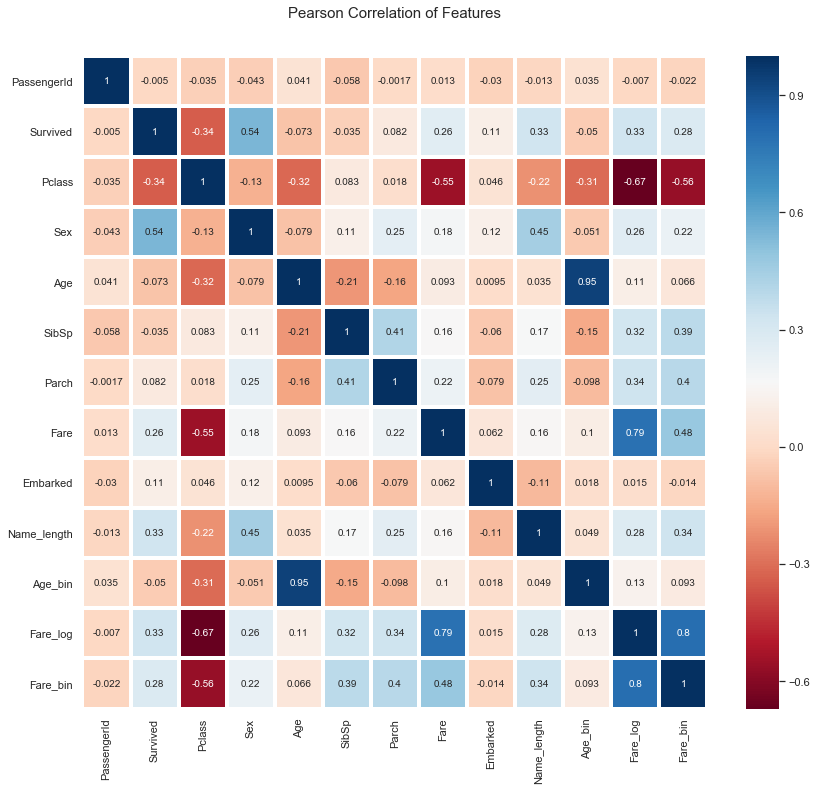

In [67]:
# STUDENT CODE HERE
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=3,vmax=1.0, square=False,cmap=colormap, linecolor='white', annot=True)
plt.show()
# STUDENT CODE until HERE

In [68]:
# STUDENT CODE HERE
drop_elements = ['PassengerId', 'SibSp', 'Age_bin','Embarked']

train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)
# STUDENT CODE until HERE

## Wrap Up

In this session you have seen how you can manipulate and prepare data. This is a very important step before learning approaches comes into play. Remember that your algorithm can only perform well, if you have proper data!

__Task: Summarize briefly what methods you have learned today. For better understanding go ahead and plot the output of each preparation method (also the combination of multiple). Also describe the plots briefly.__

We learned how to combine datasets, how to get an overview of the data we are working with, how to detect and remove outliers from our dataset and how to fill missing data without changing the overall information of the dataset. We also learned how to summarize data in bins that describe the data in the same way as before but with less detail and we learned how to map data.